# Google Cloud CMIP6 Public Data: Basic Julia Example

This notebooks shows how to query the catalog and load the data using Julia. Most of the syntax here comes directly from the [Zarr.jl docs](https://meggart.github.io/Zarr.jl/latest/s3examples/).

In [1]:
using Zarr, AWSCore
using DataFrames, CSV, Query
using CFTime, Dates
import Plots

In [2]:
aws_google = AWSCore.aws_config(creds=nothing, region="", service_host="googleapis.com", service_name="storage")

Dict{Symbol,Any} with 4 entries:
  :service_name => "storage"
  :service_host => "googleapis.com"
  :creds        => nothing
  :region       => ""

## Browse Catalog

The data catatalog is stored as a CSV file. Here we read it into a DataFrame

In [3]:
cmip6_base = S3Store("cmip6","", aws=aws_google, listversion=1)

S3 Object Storage

In [4]:
df = CSV.read(IOBuffer(cmip6_base["cmip6-zarr-consolidated-stores.csv"]))

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id
,String,String,String,String,String,String,String
1,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,ch4
2,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,clt
3,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,co2
4,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,evspsbl
5,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,hfls
6,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,hfss
7,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,hus
8,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,o3
9,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,pr


The columns of the dataframe correspond to the CMI6 controlled vocabulary. A beginners' guide to these terms is available in [this document](https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q). 

Here we filter the data to find monthly surface air temperature for historical experiments.

In [5]:
df_ta = df |> @filter(_.activity_id=="CMIP" && 
                      _.table_id=="Amon" &&
                      _.variable_id=="tas" &&
                      _.experiment_id=="historical") |> DataFrame

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id
,String,String,String,String,String,String,String
1,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Amon,tas
2,CMIP,BCC,BCC-CSM2-MR,historical,r2i1p1f1,Amon,tas
3,CMIP,BCC,BCC-CSM2-MR,historical,r3i1p1f1,Amon,tas
4,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Amon,tas
5,CMIP,BCC,BCC-ESM1,historical,r2i1p1f1,Amon,tas
6,CMIP,BCC,BCC-ESM1,historical,r3i1p1f1,Amon,tas
7,CMIP,CAMS,CAMS-CSM1-0,historical,r1i1p1f1,Amon,tas
8,CMIP,CAMS,CAMS-CSM1-0,historical,r2i1p1f1,Amon,tas
9,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas


Now we do further filtering to find just the models from NCAR.

In [6]:
df_ta_ncar = df_ta |> @filter(_.institution_id=="NCAR") |> DataFrame

,activity_id,institution_id,source_id,experiment_id,member_id,table_id
,String,String,String,String,String,String
1,CMIP,NCAR,CESM2-FV2,historical,r1i1p1f1,Amon
2,CMIP,NCAR,CESM2-WACCM-FV2,historical,r1i1p1f1,Amon
3,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon
4,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon
5,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Amon
6,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon
7,CMIP,NCAR,CESM2,historical,r11i1p1f1,Amon
8,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon
9,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon


## Load Data

Now we will load a single store using gcsfs, zarr, and xarray.

In [7]:
print(df_ta_ncar.zstore[end])
# the part we want
path = df_ta_ncar.zstore[end][12:end]

gs://cmip6/CMIP/NCAR/CESM2/historical/r9i1p1f1/Amon/tas/gn/

"CMIP/NCAR/CESM2/historical/r9i1p1f1/Amon/tas/gn/"

In [8]:
zgroup = zopen(S3Store("cmip6", path, aws=aws_google, listversion=1))

ZarrGroup at S3 Object Storage
Variables: lat time tas lat_bnds lon_bnds lon time_bnds 

Plot the first value as a map.

In [9]:
lon = zgroup["lon"][:]
lat = zgroup["lat"][:]
tas = zgroup["tas"][:,:,1];

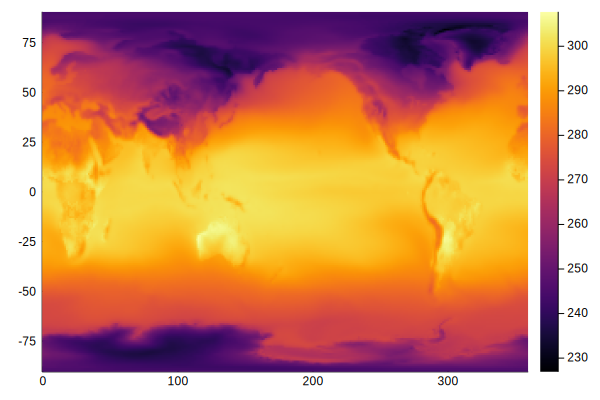

In [10]:
Plots.heatmap(lon, lat ,transpose(tas))

Create a timeseries of global-average surface air temperature. For this we need the area weighting factor for each gridpoint.

In [11]:
df_area = df |> @filter(_.variable_id=="areacella" && _.source_id=="CESM2") |> DataFrame

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id
,String,String,String,String,String,String,String
1,CFMIP,NCAR,CESM2,amip-4xCO2,r1i1p1f1,fx,areacella
2,CFMIP,NCAR,CESM2,amip-future4K,r1i1p1f1,fx,areacella
3,CFMIP,NCAR,CESM2,amip-m4K,r1i1p1f1,fx,areacella
4,CFMIP,NCAR,CESM2,amip-p4K,r1i1p1f1,fx,areacella
5,CFMIP,NCAR,CESM2,aqua-4xCO2,r1i1p1f1,fx,areacella
6,CFMIP,NCAR,CESM2,aqua-control,r1i1p1f1,fx,areacella
7,CFMIP,NCAR,CESM2,aqua-p4K,r1i1p1f1,fx,areacella
8,CMIP,NCAR,CESM2,1pctCO2,r1i1p1f1,fx,areacella
9,CMIP,NCAR,CESM2,abrupt-4xCO2,r1i1p1f1,fx,areacella


In [12]:
path = df_area.zstore[1][12:end]
area = zopen(S3Store("cmip6", path, aws=aws_google, listversion=1))["areacella"][:, :]

288×192 reshape(::Array{Union{Missing, Float32},2}, 288, 192) with eltype Union{Missing, Float32}:
 2.99484e7  2.39575e8  4.79085e8  …  4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8     4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8     4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8     4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8     4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8  …  4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8     4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8     4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8     4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8     4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8  …  4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8     4.79085e8  2.39575e8  2.99484e7
 2.99484e7  2.39575e8  4.79085e8     4.79085e8  2.39575e8  2.99484e7
 ⋮  

In [13]:
time_raw = zgroup["time"][:]
units = zgroup["time"].attrs["units"]
calendar = zgroup["time"].attrs["calendar"]
time = CFTime.timedecode(time_raw, units, calendar)
#Function to convert the CFTime datetime to stdlib datetime
cf2dt(t) = DateTime(year(t),month(t),day(t),hour(t),minute(t),second(t))
time_dt = cf2dt.(time)

1980-element Array{DateTime,1}:
 1850-01-15T12:00:00
 1850-02-14T00:00:00
 1850-03-15T12:00:00
 1850-04-15T00:00:00
 1850-05-15T12:00:00
 1850-06-15T00:00:00
 1850-07-15T12:00:00
 1850-08-15T12:00:00
 1850-09-15T00:00:00
 1850-10-15T12:00:00
 1850-11-15T00:00:00
 1850-12-15T12:00:00
 1851-01-15T12:00:00
 ⋮                  
 2014-01-15T12:00:00
 2014-02-14T00:00:00
 2014-03-15T12:00:00
 2014-04-15T00:00:00
 2014-05-15T12:00:00
 2014-06-15T00:00:00
 2014-07-15T12:00:00
 2014-08-15T12:00:00
 2014-09-15T00:00:00
 2014-10-15T12:00:00
 2014-11-15T00:00:00
 2014-12-15T12:00:00

In [14]:
tas_full = zgroup["tas"][:, :, :]
timeseries = (sum(tas_full .* area, dims=(1, 2)) / sum(area))[:]

1980-element Array{Float32,1}:
 285.64053
 285.5736 
 286.33823
 287.15958
 288.07086
 288.70477
 289.04593
 288.80136
 288.21335
 287.57678
 286.66376
 285.86182
 285.4471 
   ⋮      
 286.50705
 286.59988
 287.4861 
 288.36584
 289.25772
 289.74753
 290.14606
 290.03363
 289.49323
 288.69885
 287.7627 
 287.06177

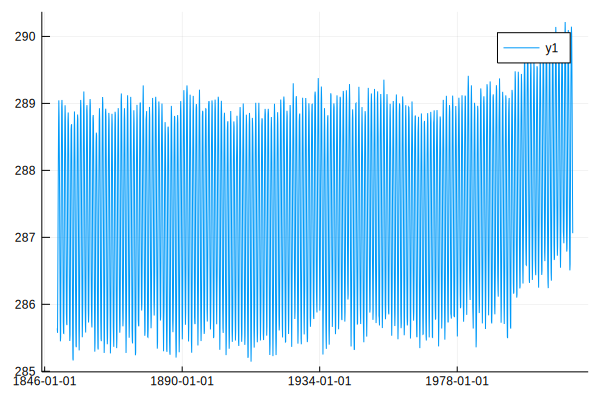

In [15]:
Plots.plot(time_dt, timeseries)